In [17]:
"""
chapter 13
"""

import theano, os, struct
from theano import tensor as T
# theano --> conda install mingw libpython : support g++

import numpy as np 

import matplotlib.pyplot as plt

In [3]:
# initialize
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

# compile
net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

# execute
print('Net input: %.2f' % net_input(2.0, 1.0, 0.5))

Net input: 2.50


In [11]:
# floating point 
print(theano.config.floatX)  # float64
# change it to float32 in current Python session 
theano.config.floatX = 'float32'

# cpu or gpu 
print(theano.config.device)  # cpu 

float64
cpu


In [10]:
# initialize: define the variable 
x = T.fmatrix(name='x')
x_sum = T.sum(x, axis=0)

# compile
calc_sum = theano.function(inputs=[x], outputs=x_sum)


# Theano can work with both Python and NumPy types
# execute (Python list)
ary = [[1, 2, 3], [1, 2, 3]]
print('Column sum:', calc_sum(ary))

# execute (NumPy array)
ary = np.array([[1, 2, 3], [1, 2, 3]], dtype='float32')  # has to be 'float32'
print('Column sum:', calc_sum(ary))


Column sum: [ 2.  4.  6.]
Column sum: [ 2.  4.  6.]


In [12]:
# memory management
# initialize
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

# compile
net_input = theano.function(inputs=[x], 
                            updates=update, 
                            outputs=z)
# execute
data = np.array([[1, 2, 3]], dtype=theano.config.floatX)

for i in range(5):
    print('z%d:' % i, net_input(data))

z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [13]:
# use the givens variable to insert values into 
# the graph before compiling it

# initialize
data = np.array([[1, 2, 3]],dtype=theano.config.floatX)
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]
# compile
net_input = theano.function(inputs=[], 
                            updates=update, 
                            givens={x: data}, # Python dictionary that maps a variable name to the actual Python object
                            outputs=z)
# execute
for i in range(5):
    print('z:', net_input())

z: [[ 0.]]
z: [[ 6.]]
z: [[ 12.]]
z: [[ 18.]]
z: [[ 24.]]


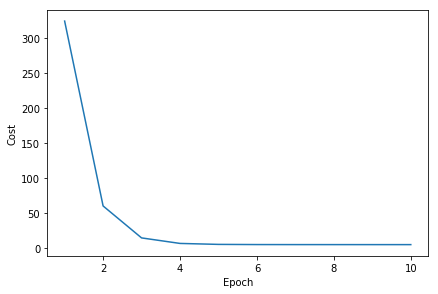

In [15]:
# liner regression example 

X_train = np.asarray([[0.0], [1.0], 
                      [2.0], [3.0], 
                      [4.0], [5.0], 
                      [6.0], [7.0], 
                      [8.0], [9.0]], 
                     dtype=theano.config.floatX)

y_train = np.asarray([1.0, 1.3, 
                      3.1, 2.0, 
                      5.0, 6.3, 
                      6.6, 7.4, 
                      8.0, 9.0], 
                     dtype=theano.config.floatX)

def train_linreg(X_train, y_train, eta, epochs):
    costs = []
    # Initialize arrays
    eta0 = T.fscalar('eta0')
    y = T.fvector(name='y') 
    X = T.fmatrix(name='X') 
    w = theano.shared(np.zeros(
                        shape=(X_train.shape[1] + 1),
                        dtype=theano.config.floatX),
                        name='w')
    
    # calculate cost
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2)) 
    # perform gradient update
    gradient = T.grad(cost, wrt=w)
    update = [(w, w - eta0 * gradient)]
    # compile model
    train = theano.function(inputs=[eta0],
                            outputs=cost,
                            updates=update,
                            givens={X: X_train,
                                    y: y_train,})      
    
    for _ in range(epochs):
        costs.append(train(eta))
    
    return costs, w


costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)
plt.plot(range(1, len(costs)+1), costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

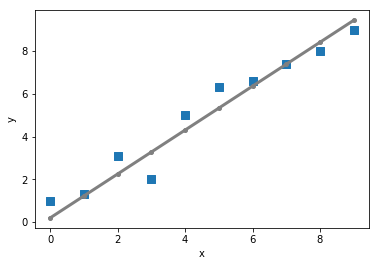

In [16]:
# compile a new function to make predictions based on the input features
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], 
                              givens={w: w}, 
                              outputs=net_input)
    return predict(X)


plt.scatter(X_train, 
            y_train, 
            marker='s', 
            s=50)

plt.plot(range(X_train.shape[0]), 
         predict_linreg(X_train, w), 
         color='gray', 
         marker='o', 
         markersize=4, 
         linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Training neural networks efficiently using Keras